### Dense optical flow based sampling
[Reference tutorial](https://docs.opencv.org/3.4/d4/dee/tutorial_optical_flow.html)

In [9]:

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


In [14]:

cap = cv.VideoCapture(cv.samples.findFile("../data/archery.mp4"))
ret, frame1 = cap.read()
prvs = cv.cvtColor(frame1, cv.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[..., 1] = 255

highest_magnitude_flow_frame = None
highest_flow = 0

flow_plot = []

while(1):
    ret, frame2 = cap.read()
    if not ret:
        print('No frames grabbed!')
        break

    next = cv.cvtColor(frame2, cv.COLOR_BGR2GRAY)
    flow = cv.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    
    # Find the frame with the highest magnitude of flow
    
    highest_magnitude_flow_frame = frame2 if highest_magnitude_flow_frame is None else highest_magnitude_flow_frame
    highest_flow = np.linalg.norm(flow) if highest_flow == 0 else highest_flow
    
    highest_flow = np.linalg.norm(flow) if np.linalg.norm(flow) > highest_flow else highest_flow
    highest_magnitude_flow_frame = frame2 if np.linalg.norm(flow) > highest_flow else highest_magnitude_flow_frame
    
    # Plot the flow
    flow_plot.append(np.linalg.norm(flow))

    
    
    
    
    
    mag, ang = cv.cartToPolar(flow[..., 0], flow[..., 1])
    hsv[..., 0] = ang*180/np.pi/2
    hsv[..., 2] = cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX)
    bgr = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
    cv.imshow('frame2', bgr)
    k = cv.waitKey(30) & 0xff
    if k == 27:
        break
    elif k == ord('s'):
        cv.imwrite('opticalfb.png', frame2)
        cv.imwrite('opticalhsv.png', bgr)
    prvs = next

cv.destroyAllWindows()

No frames grabbed!


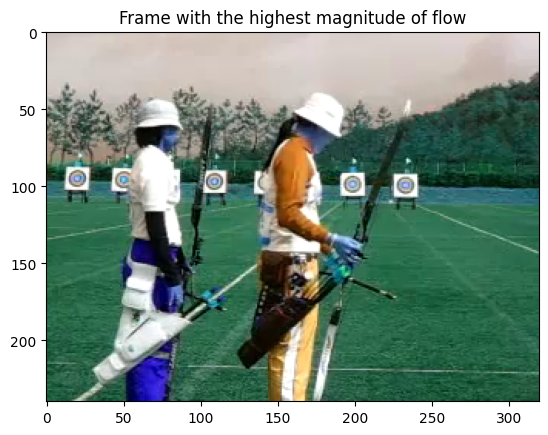

Highest magnitude of flow:  418.16025


In [15]:
# display the frame with the highest magnitude of flow
plt.imshow(highest_magnitude_flow_frame)
plt.title('Frame with the highest magnitude of flow')
plt.show()
print('Highest magnitude of flow: ', highest_flow)

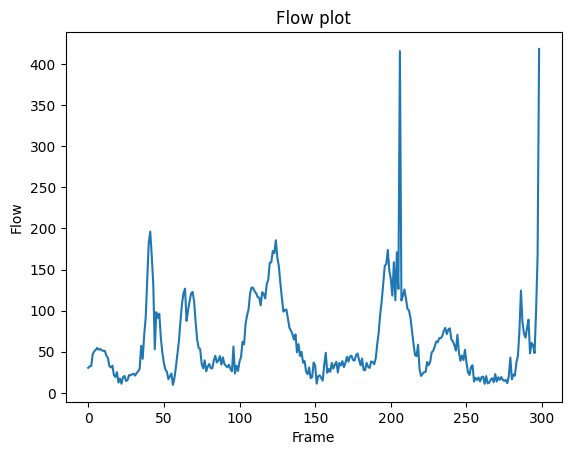

In [17]:
plt.plot(flow_plot)
plt.title('Flow plot')
plt.xlabel('Frame')
plt.ylabel('Flow')
plt.show()